# BoomBikes Case Study

A US bike-sharing provider BoomBikes is a bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.



### Problem Statement

BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Objectives

1. Data Preprocessing
2. Exploratory Data Analysis
3. The given problem is exactly about predicting the total number of bike rentals, which is a real-valued value, thus it falls into the Regression Category
4. To understand how exactly the demands vary with different features
5. Model to be a good way for management to understand the demand dynamics of a new market. 

## Data Description

- `instant`: record index
- `dteday` : date
- `season` : season (1:spring, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2018, 1:2019)
- `mnth` : month ( 1 to 12)
- `holiday` : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
- `weathersit` : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : temperature in Celsius
- `atemp`: feeling temperature in Celsius
- `hum`: humidity
- `windspeed`: wind speed
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered


According to our case study we can say that,

**Target Variable:** `cnt`

## Step 1 - Exploratory Data Analysis

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings  
warnings.filterwarnings('ignore') # to ignore the warnings

Taking a glance through the data file i.e. **day.csv** file, we can see that first column is instant no. which can be ignored. As it is just a number which indicates the no. of records and can be used as index rather than considering it into the data.

In [2]:
# Loading the data
data = pd.read_csv('day.csv',index_col=0)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Data dimensions
print(data.shape)

(730, 15)


The data consists of 730 records and 15 columns

In [4]:
# Data types
data.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
# Columns in the data
data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

Deleting the columns `casual` and `registered`, as **count(Target Variable)** of total users = sum of `casual` users and `registered` users. It means that while computing we would not have the data regarding the casual user and register user. It is better to delete it.

Deleting the `dteday` as it is a date column and every value is unique

In [6]:
# Deleting casual and registered user column
data.drop(['dteday','casual','registered'],axis = 1,inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Checking the null values in the data
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no null values in any of the columns so we don't have to handle missing values.

In [8]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [9]:
data[data['hum'] ==0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
69,1,0,3,0,4,1,3,15.952731,19.2834,0.0,17.545759,623


We know 0% humidity is impossible to achieve naturally. 
It is better to remove the row, as imputation of humidity is not posssible because different `season` and `weathersit` depends on determining the humidity. We don't have sufficient data to impute the value.
If we impute a wrong value there is a chance of overexaggerating the data which can lead to poor accuracy.

In [10]:
data = data[data['hum'] !=0]

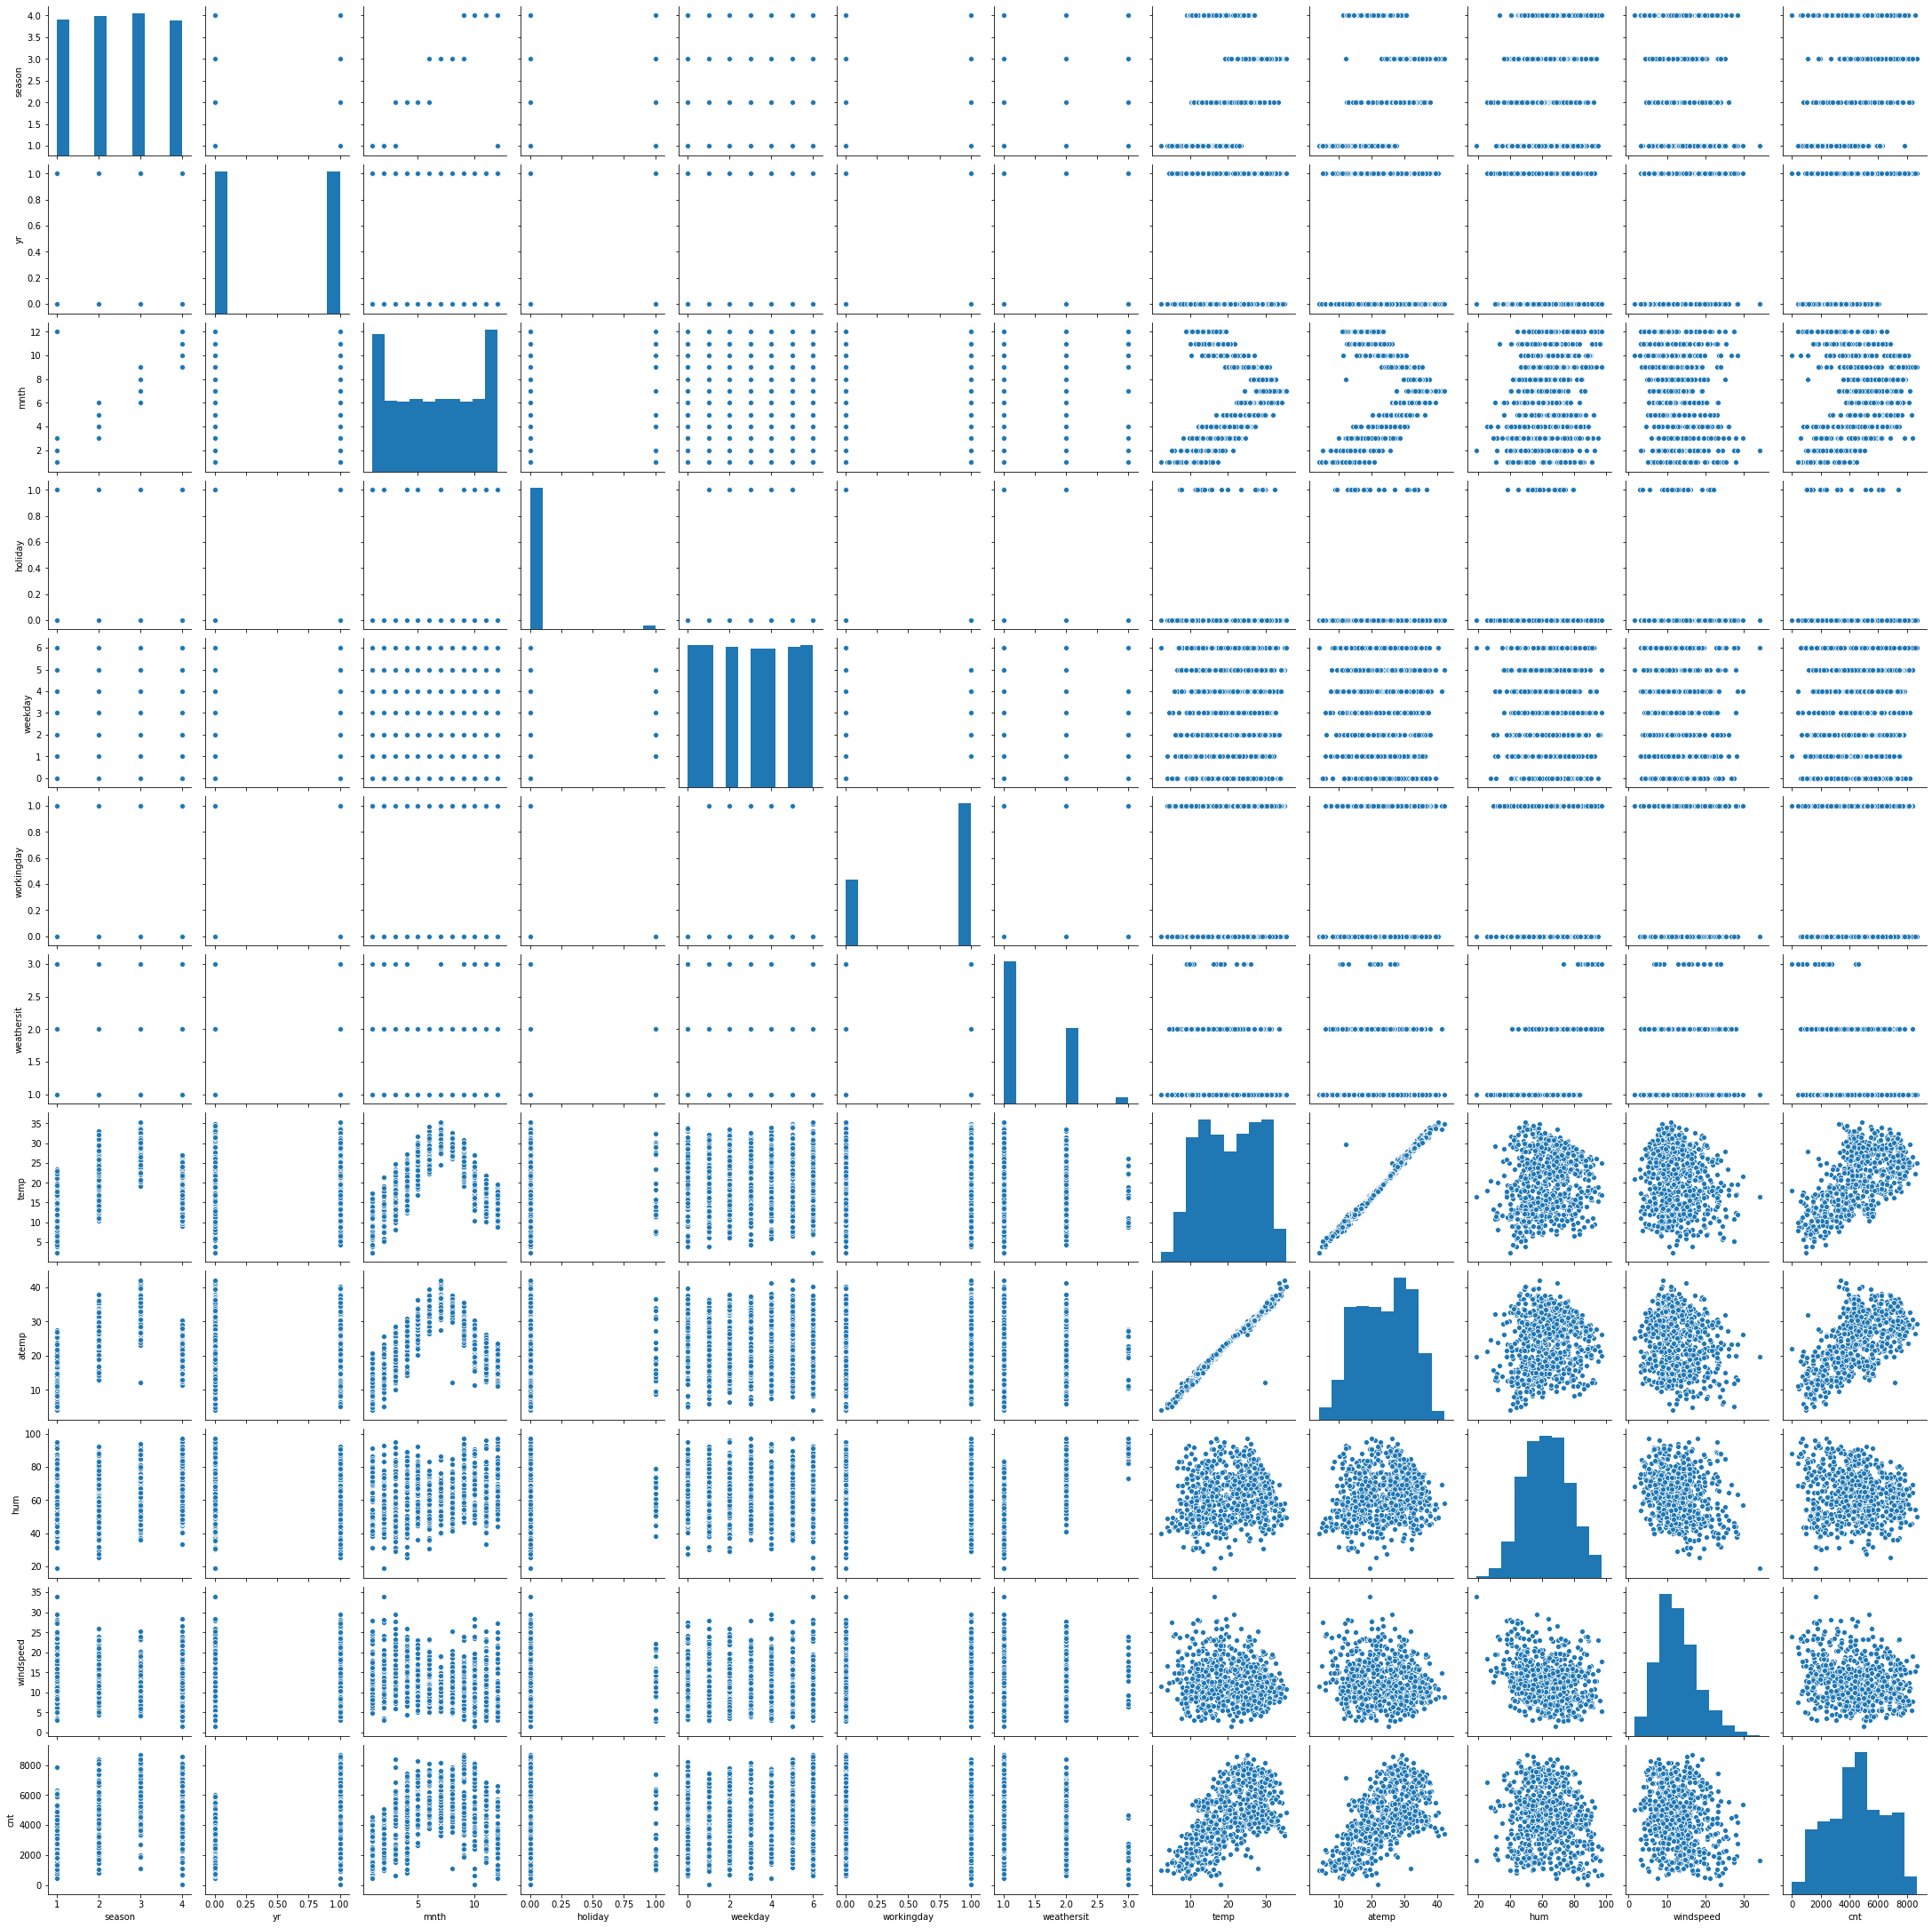

In [11]:
# pairplot
sns.pairplot(data)
plt.show()

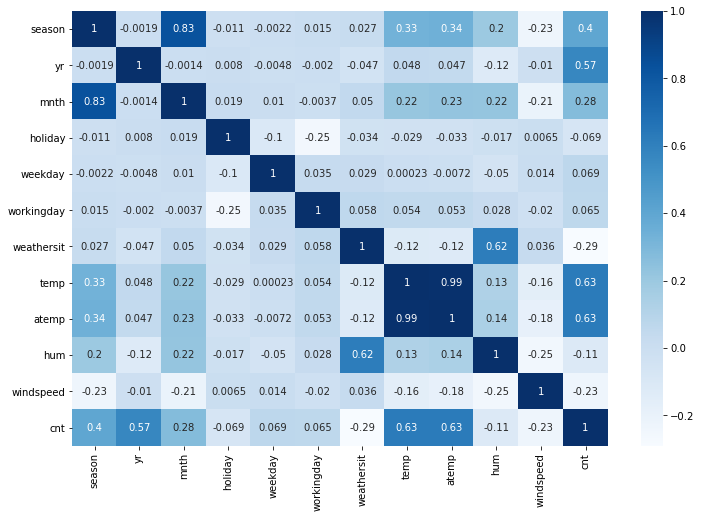

In [12]:
# Checking for correlation
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot = True,cmap = 'Blues')
plt.show()

We can observe that `temp` and `atemp` is correlated to each other and having almost same significance across all the variables. As we know `atemp` is also known as **heat index**, it will be very helpful to determining the no. of person renting the bikes.

In [13]:
# deleting temp
data.drop(['temp'],axis=1,inplace = True)

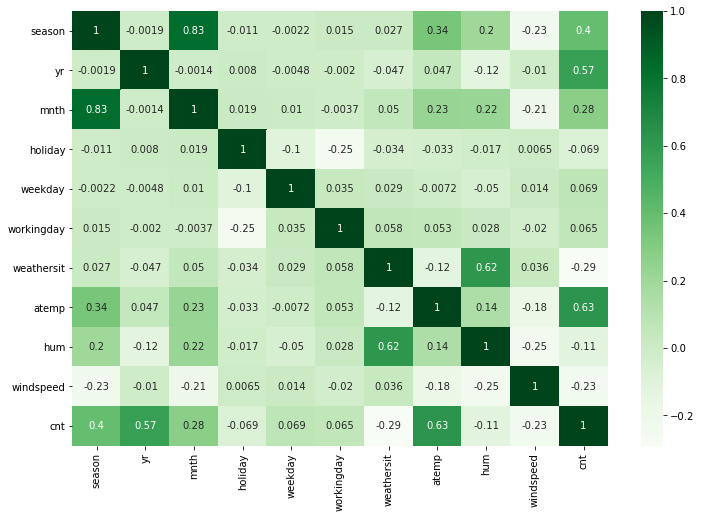

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot = True,cmap = 'Greens')
plt.show()

We can see that `season` and `mnth` are correlated to each other, so we can delete the `mnth` column.

In [15]:
del data['mnth']

In [16]:
# Checking whether the month column deleted or not.
data.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
instant,,,,,,,,,,
1,1,0,0,6,0,2,18.18125,80.5833,10.749882,985
2,1,0,0,0,0,2,17.68695,69.6087,16.652113,801
3,1,0,0,1,1,1,9.47025,43.7273,16.636703,1349
4,1,0,0,2,1,1,10.60610,59.0435,10.739832,1562
5,1,0,0,3,1,1,11.46350,43.6957,12.522300,1600


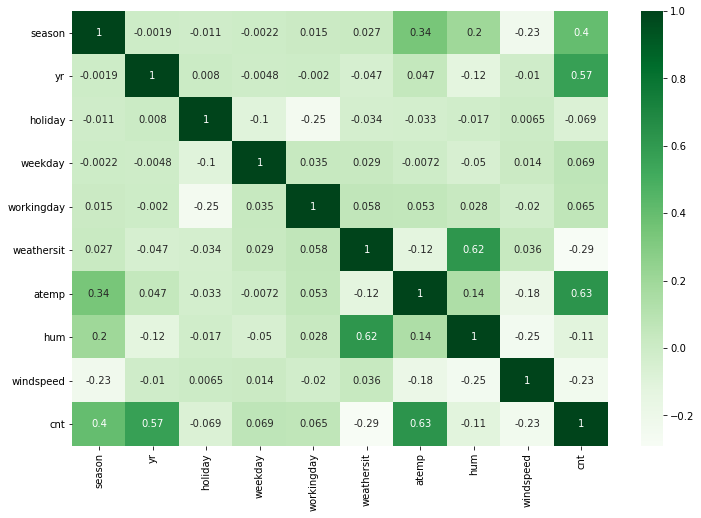

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot = True,cmap = 'Greens')
plt.show()

We can observe that independent variables are not correlated anymore. So we can move forward with our data.

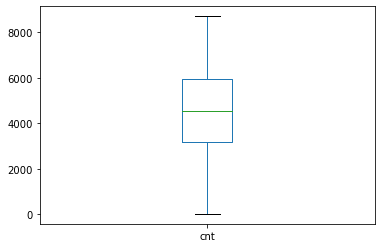

In [18]:
# boxplot to see whether we have outlier in dependent variables.
data['cnt'].plot(kind = 'box')
plt.show()

We can observe that we don't have any outliers in target variables.

**According to Working days**

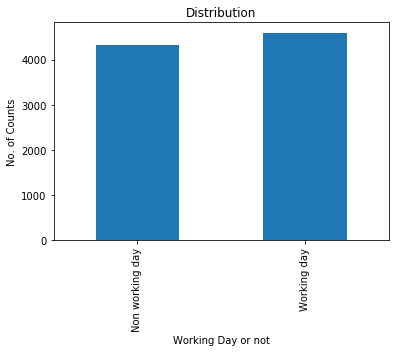

Non working day    4330.168831
Working day        4598.299197
Name: cnt, dtype: float64


In [19]:
data1  = data.groupby(by = ['workingday'])['cnt'].mean()
data1.index = ['Non working day','Working day']
data1.plot(kind = 'bar')
plt.xlabel('Working Day or not')
plt.ylabel('No. of Counts')
plt.title('Distribution')
plt.show()
print(data1)

We can observe that bikes rent on working day is slightly more than non working day. It might be due to bikes were rented for commuting to workplace.

**According to holidays**

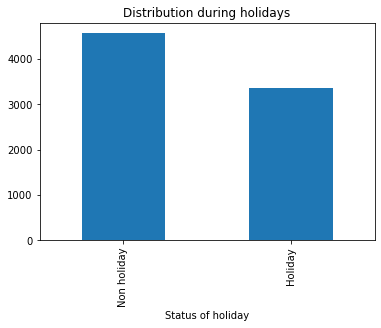

In [20]:
data1 = data.groupby(by = ['holiday'])['cnt'].median()
data1.index = ['Non holiday','Holiday']
data1.plot(kind = 'bar',stacked = True)
plt.xlabel('Status of holiday')
plt.title('Distribution during holidays')
plt.show()

We can observe that on holiday the no. of bikes rented are lower so we can say that the holiday might be significant.

**According to Season**

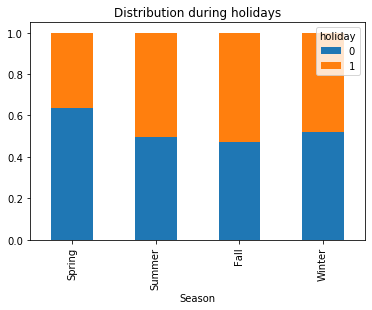

In [21]:
data1 = data.groupby(by = ['season','holiday'])['cnt'].median()
data1 = data1.unstack()
data1.index = ['Spring', 'Summer', 'Fall', 'Winter']
data1 = data1.apply(lambda x: x/x.sum(),axis = 1)
data1.plot(kind = 'bar',stacked = True)
plt.xlabel('Season')
plt.title('Distribution during holidays')
plt.show()

We can observe that during **spring** season bike were rent more often on non holiday compared to holidays.

**Creating Dummy Variables**

Creating dummy variable on Season,weekday and weathersit columns as it is categorical variable and mis classified as numeric variables

In [22]:
season = pd.get_dummies(data['season'],drop_first = True)
season.columns = ['Summer','Fall','Winter']
data = pd.concat((data,season),axis=1)
data.drop(['season'],axis = 1,inplace = True)
data.head()

,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Summer,Fall,Winter
instant,,,,,,,,,,,,
1,0,0,6,0,2,18.18125,80.5833,10.749882,985,0,0,0
2,0,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0
3,0,0,1,1,1,9.47025,43.7273,16.636703,1349,0,0,0
4,0,0,2,1,1,10.60610,59.0435,10.739832,1562,0,0,0
5,0,0,3,1,1,11.46350,43.6957,12.522300,1600,0,0,0


In [23]:
weekday = pd.get_dummies(data['weekday'],drop_first = True)
weekday.columns = ['Mon','Tue','Wed','Thur','Fri','Sat']
data = pd.concat((data,weekday),axis=1)
data.drop(['weekday'],axis = 1,inplace = True)
data.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Mon,Tue,Wed,Thur,Fri,Sat
instant,,,,,,,,,,,,,,,,,
1,0,0,0,2,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1
2,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0
3,0,0,1,1,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0
4,0,0,1,1,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0
5,0,0,1,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0


In [24]:
weather = pd.get_dummies(data['weathersit'],drop_first = True)
weather.columns = ['Mist+Cloudy','Light Rain / Light Snow']
data = pd.concat((data,weather),axis=1)
data.drop(['weathersit'],axis = 1,inplace = True)
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Mon,Tue,Wed,Thur,Fri,Sat,Mist+Cloudy,Light Rain / Light Snow
instant,,,,,,,,,,,,,,,,,,
1,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0
5,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,0,0


## Step 2 - Model building

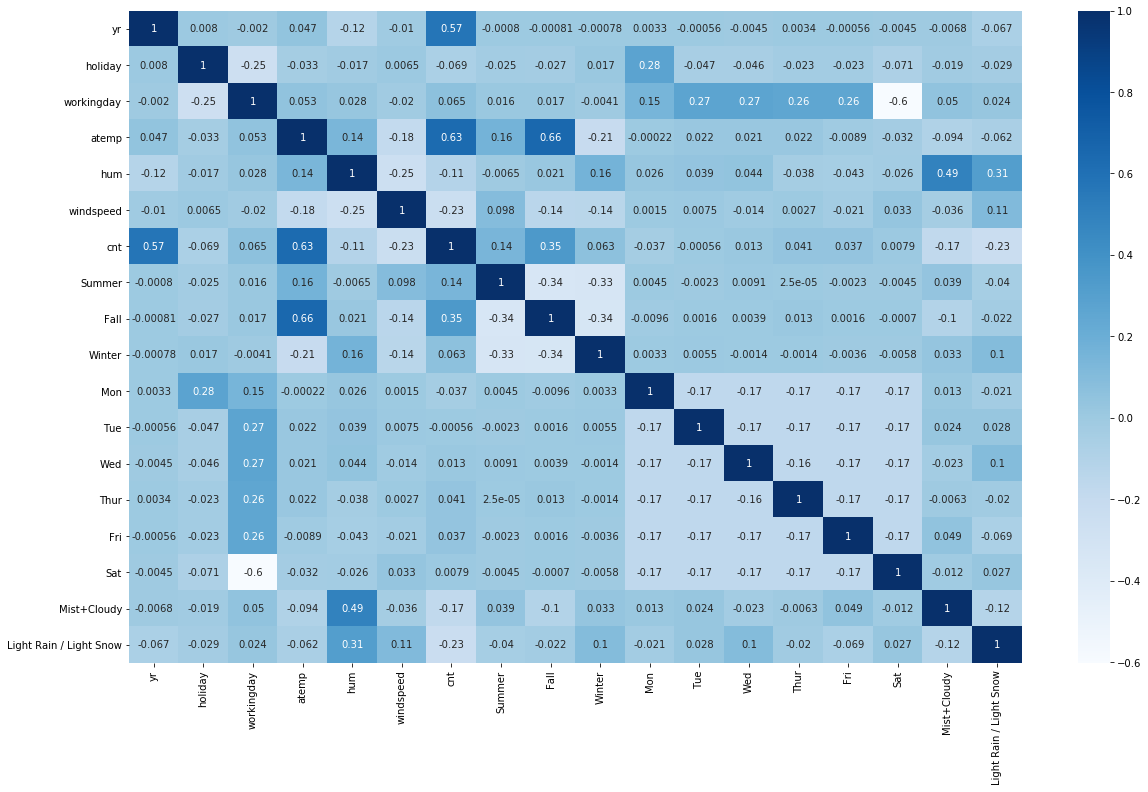

In [25]:
# before trying to split the data we shall check one last time whether any variables are correlated to each other or not.
plt.figure(figsize = (20,12))
sns.heatmap(data.corr(),annot = True,cmap = 'Blues')
plt.show()

We can see that there is no correlation between any independent variables.

In [26]:
# train test split
y = data.pop('cnt')
X = data

In [27]:
# as the data is very less we are spliting the data in 80-20 pattern
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(583, 17)
(583,)
(146, 17)
(146,)


**Scaling**

Scaling `atemp`, `hum` and `windspeed` to keep all independent variables in one scale.

Here we are using normalization as it will take care of outliers.

In [28]:
var_list = ['atemp','hum','windspeed']
scale = MinMaxScaler()

X_train[var_list] = scale.fit_transform(X_train[var_list])

In [29]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,Summer,Fall,Winter,Mon,Tue,Wed,Thur,Fri,Sat,Mist+Cloudy,Light Rain / Light Snow
instant,,,,,,,,,,,,,,,,,
368,1,0,1,0.065035,0.327057,0.695175,0,0,0,0,1,0,0,0,0,0,0
330,0,0,0,0.421603,0.637440,0.056146,0,0,1,0,0,0,0,0,1,0,0
45,0,0,1,0.439875,0.242603,0.807474,0,0,0,1,0,0,0,0,0,0,0
593,1,0,1,0.793034,0.427649,0.213888,0,1,0,0,0,0,1,0,0,0,0
547,1,0,0,0.925213,0.427111,0.271359,0,1,0,0,0,0,0,0,0,0,0


we can see that feature scaling has been done in X_train

In [30]:
# adding constant to X_train as Stat model don't consider constant.
X_train_sm = sm.add_constant(X_train)

In [31]:
# creating the model
lr = sm.OLS(y_train,X_train_sm)
model_lr= lr.fit()

In [32]:
# As there are 17 variable,running RFE with the output number of the variable equal to 12.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)   
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', True, 1),
 ('Winter', True, 1),
 ('Mon', False, 3),
 ('Tue', False, 5),
 ('Wed', False, 4),
 ('Thur', False, 6),
 ('Fri', False, 2),
 ('Sat', True, 1),
 ('Mist+Cloudy', True, 1),
 ('Light Rain / Light Snow', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Summer',
       'Fall', 'Winter', 'Sat', 'Mist+Cloudy', 'Light Rain / Light Snow'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     237.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.34e-213
Time:                        13:46:46   Log-Likelihood:                -4718.1
No. Observations:                 583   AIC:                             9462.
Df Residuals:                     570   BIC:                             9519.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [36]:
# Calculating the VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_new.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_new.values, i) for i in range(len(X_train_new.columns))]
  
print(vif_data)


                    feature        VIF
0                        yr   2.046187
1                   holiday   1.156317
2                workingday   4.645906
3                     atemp  21.534391
4                       hum  13.325529
5                 windspeed   3.542074
6                    Summer   3.369875
7                      Fall   5.884561
8                    Winter   2.481055
9                       Sat   1.688556
10              Mist+Cloudy   2.330451
11  Light Rain / Light Snow   1.223101


In [37]:
# we can see that holiday is having high p-value and low vif, we can delete it and repeat the above steps again.
X_train_new = X_train_rfe.drop(['holiday'],axis = 1)


# building the model again 
# add constant
X_train_sm = sm.add_constant(X_train_new)

# Model OLS
lr = sm.OLS(y_train,X_train_sm)
model_lr= lr.fit()

# Model summary
print(model_lr.summary())

# Calculating the VIF
X_train_new = X_train_new.drop(['const'], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_new.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_new.values, i) for i in range(len(X_train_new.columns))]

print('')
print("VIF as follows")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.13e-213
Time:                        13:46:47   Log-Likelihood:                -4719.6
No. Observations:                 583   AIC:                             9463.
Df Residuals:                     571   BIC:                             9516.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [38]:
# we can see that atemp is having low p-value and high vif, we can delete it and repeat the above steps again.
X_train_new = X_train_new.drop(['atemp'],axis = 1)


# building the model again 
# add constant
X_train_sm = sm.add_constant(X_train_new)

# Model OLS
lr = sm.OLS(y_train,X_train_sm)
model_lr= lr.fit()

# Model summary
print(model_lr.summary())

# Calculating the VIF

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_new.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_new.values, i) for i in range(len(X_train_new.columns))]

print('')
print("VIF as follows")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     180.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.44e-169
Time:                        13:46:47   Log-Likelihood:                -4825.7
No. Observations:                 583   AIC:                             9673.
Df Residuals:                     572   BIC:                             9721.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [39]:
# we can see that hum is having high p-value and high vif, we can delete it and repeat the above steps again.
X_train_new = X_train_new.drop(['hum'],axis = 1)


# building the model again 
# add constant
X_train_sm = sm.add_constant(X_train_new)

# Model OLS
lr = sm.OLS(y_train,X_train_sm)
model_lr= lr.fit()

# Model summary
print(model_lr.summary())



# Calculating the VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_new.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_new.values, i) for i in range(len(X_train_new.columns))]

print('')
print("VIF as follows")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     200.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.95e-171
Time:                        13:46:47   Log-Likelihood:                -4825.7
No. Observations:                 583   AIC:                             9671.
Df Residuals:                     573   BIC:                             9715.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [40]:
# predicting the value on train data.
y_train_pred = model_lr.predict(X_train_sm)
r2_score_train = r2_score(y_train,y_train_pred)
print("The r2 score for train is {}".format(r2_score_train))

The r2 score for train is 0.7591527781852576


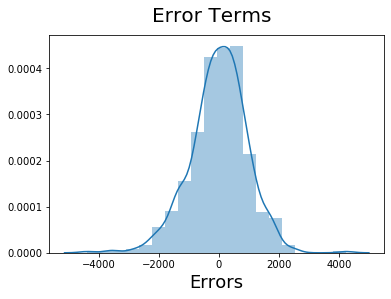

In [41]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

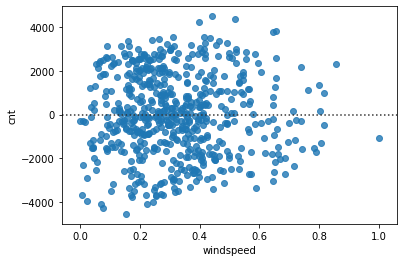

In [42]:
#  Homoscedasticity on training data
sns.residplot(x = X_train["windspeed"],y = y_train)
plt.show()

**Observations**

We can see that after deleting all insignificant variable we are getting model with following details - 
   - rsquare = 0.759 (for training data)
   - adjusted rsquare = 0.755 (for training data)
   - We can see that durbin watson = 2.057 which means that error is not autocorrelated (following our assumption of linear regression problem)
   - We can see that error are normally distributed (following our assumption of linear regression problem).
   - We can see that residual plot is random and it not increasing as the windspeed is increasing so we can say that it is Homoscedastic (follows the assumption of linear regression)


In [43]:
# all preprocessing done on train set has to be done on test as well before predicting the test value
# scaling
var_list = ['atemp','hum','windspeed']

X_test[var_list] = scale.transform(X_test[var_list])
X_test.head()


,yr,holiday,workingday,atemp,hum,windspeed,Summer,Fall,Winter,Mon,Tue,Wed,Thur,Fri,Sat,Mist+Cloudy,Light Rain / Light Snow
instant,,,,,,,,,,,,,,,,,
186,0,0,1,0.850415,0.519634,0.180484,0,1,0,0,1,0,0,0,0,0,0
640,1,0,1,0.638242,0.882733,0.133655,0,0,1,0,1,0,0,0,0,0,1
301,0,0,1,0.330295,0.513716,0.402389,0,0,1,0,0,0,0,1,0,1,0
223,0,0,1,0.788671,0.304464,0.263333,0,1,0,0,0,0,1,0,0,0,0
154,0,0,1,0.699963,0.214632,0.453215,1,0,0,0,0,0,0,1,0,0,0


In [44]:
# removing all the insignificant data as we did in training data.
final_col = X_train_sm.columns[1:]
final_col
X_test = X_test[final_col]

# add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,windspeed,Summer,Fall,Winter,Sat,Mist+Cloudy,Light Rain / Light Snow
instant,,,,,,,,,,
186,1.0,0,1,0.180484,0,1,0,0,0,0
640,1.0,1,1,0.133655,0,0,1,0,0,1
301,1.0,0,1,0.402389,0,0,1,0,1,0
223,1.0,0,1,0.263333,0,1,0,0,0,0
154,1.0,0,1,0.453215,1,0,0,0,0,0


In [45]:
# predicting on test data.
y_test_pred = model_lr.predict(X_test_sm)

In [46]:
print("The r2 score for train is {}".format(r2_score_train))
r2_score_test = r2_score(y_test,y_test_pred)
print("The r2 score for test is {}".format(r2_score_test))

The r2 score for train is 0.7591527781852576
The r2 score for test is 0.7426247759947744


We can see that r2 score of train and test is very close which means we can rely on the above model.

## Step 3 - Model Evaluation

In [47]:
# R-Squared
r2_score_test = r2_score(y_test,y_test_pred)

r2_score_train = r2_score(y_train,y_train_pred)
print("The r2 score for train is {}".format(r2_score_train))
print("The r2 score for test is {}".format(r2_score_test))

The r2 score for train is 0.7591527781852576
The r2 score for test is 0.7426247759947744


In [48]:
# Adjusted R-Squared

adj_R2_train = 1- ((1-r2_score_train) * (len(X_train)-1)/(len(X_train)-(len(X_train_new.columns))-1))
print("The adjusted r2 score for train is {}".format(adj_R2_train))

adj_R2_test = 1- ((1-r2_score_test) * (len(X_test)-1)/(len(X_test)-(len(X_test.columns))-1))
print("The adjusted r2 score for test is {}".format(adj_R2_test))

The adjusted r2 score for train is 0.7553698375284815
The adjusted r2 score for test is 0.7255925920532521


Text(0, 0.5, 'y Test Pred')

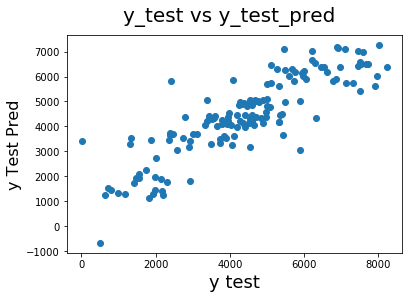

In [49]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)           
plt.xlabel('y test', fontsize=18)                          
plt.ylabel('y Test Pred', fontsize=16) 

We can observe that the spreadness of predicted value to the actual value is same through the plot.

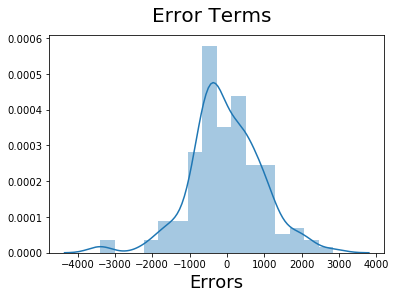

In [50]:
# checking for whether the error of test is normally distributed or not
fig = plt.figure()
sns.distplot((y_test - y_test_pred))
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

We can see that error has mean close to 0. And also it is almost normally distributed.

## Step 4 - Conclusions

We have done Data cleaning, Exploratory data analysis and build Linear Regression Model to get better insights of data. We found following driving variable which will give us inference about the count of rented bike. 

Following are the predictor variable which effect the counts - 
   - `yr` - As the year increases, the counts also increases. This might be due to increase in popularity among people.
   - `Workingday` - We can say that on working days people usually prefer renting the bike. This might be because they are using it to commute to workplace.
   - `windspeed` - As we all know that if the windspeed is high then it is difficult to ride a bike. We can see that in this data, windspeed is having a negative coefficient which means when windspeed is high the count will decrease.
   - `Summer`, `winter`, `fall` -  During Summer, winter and fall season the sum of count is more compared to spring. We have observed that spring season has more holidays compared to other season. Hence, people might have rented less bikes during spring.
   - `Sat` - We can see that the coefficient of Saturday is positive, which means on saturday there is more chance of bike rents than other weekdays.
   - `Mist+Cloudy`,`Light Rain / Light Snow` - We can say that whenever the weather is clear or few clouds, most of the people consider to ride bikes which can be explained by the coefficients of both variables which is negative.
    
